In [1]:
#hide
import os
import sys
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.simplefilter('ignore')
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from HierarchicalGeoClustering.TreeClusters import *
from HierarchicalGeoClustering.Clustering import *


# Hierarchical Geo Clustering 

> 

This file will become your README and also the index of your documentation.

## Install

`pip install your_project_name`

## How to use

We can build a hierarchical geographical cluster, the `TreeCluster` class allows to create te structure and then populate it.

In [2]:
HGC = TreeClusters(3, random_seed= 12)

In [3]:
HGC.populate_tree(number_per_cluster=100)

In [4]:
HGC.print_structure()

Root
Root    
├── Root_l_0_n_0
│   ├── Root_l_0_n_0_l_1_n_0
│   │   ├── Root_l_0_n_0_l_1_n_0_l_2_n_0
│   │   ├── Root_l_0_n_0_l_1_n_0_l_2_n_1
│   │   ├── Root_l_0_n_0_l_1_n_0_l_2_n_2
│   │   ├── Root_l_0_n_0_l_1_n_0_l_2_n_3
│   │   └── Root_l_0_n_0_l_1_n_0_l_2_n_4
│   └── Root_l_0_n_0_l_1_n_1
│       ├── Root_l_0_n_0_l_1_n_1_l_2_n_0
│       └── Root_l_0_n_0_l_1_n_1_l_2_n_1
├── Root_l_0_n_1
│   ├── Root_l_0_n_1_l_1_n_0
│   │   └── Root_l_0_n_1_l_1_n_0_l_2_n_0
│   ├── Root_l_0_n_1_l_1_n_1
│   │   ├── Root_l_0_n_1_l_1_n_1_l_2_n_0
│   │   ├── Root_l_0_n_1_l_1_n_1_l_2_n_1
│   │   └── Root_l_0_n_1_l_1_n_1_l_2_n_2
│   ├── Root_l_0_n_1_l_1_n_2
│   ├── Root_l_0_n_1_l_1_n_3
│   │   ├── Root_l_0_n_1_l_1_n_3_l_2_n_0
│   │   └── Root_l_0_n_1_l_1_n_3_l_2_n_1
│   └── Root_l_0_n_1_l_1_n_4
│       ├── Root_l_0_n_1_l_1_n_4_l_2_n_0
│       ├── Root_l_0_n_1_l_1_n_4_l_2_n_1
│       └── Root_l_0_n_1_l_1_n_4_l_2_n_2
└── Root_l_0_n_2
    ├── Root_l_0_n_2_l_1_n_0
    │   ├── Root_l_0_n_2_l_1_n_0_l_2_n_0
    │ 

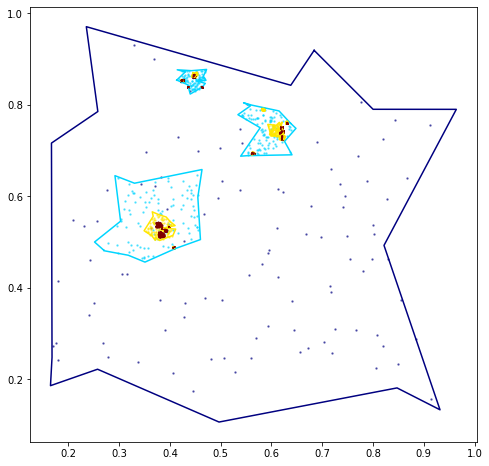

In [5]:
fig, axs = plt.subplots( figsize=(8,8))
HGC.visualize(axs, polygon=True)

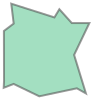

In [6]:
HGC.root.polygon_cluster

In [7]:
HGC.get_deepth()

4

To clusterize we extract the points and use the clusterize tool implemented in the `Clustering` module

In [8]:
original_points= HGC.get_points_tree()
X_2=np.array([[p.x,p.y] for p in original_points])
dic_points={'points':[X_2], 'parent':''}

In [15]:
HGC_adapta_DBSCAN = recursive_clustering_tree(dic_points,
                                       levels_clustering = 3,
                                       algorithm = 'adaptive_DBSCAN'
                                      )